In [1]:
import pandas as pd
import os
import re

ModuleNotFoundError: No module named 'pandas'

In [12]:
for dirpath, dirnames, filenames in os.walk('movilen'):
    for filename in filenames:
        print(os.path.join(dirpath, filename))

movilen\links.csv
movilen\movies.csv
movilen\ratings.csv
movilen\README.txt
movilen\tags.csv


In [13]:
links = pd.read_csv('movilen/links.csv')
movies = pd.read_csv('movilen/movies.csv')
ratings = pd.read_csv('movilen/ratings.csv')
tags = pd.read_csv('movilen/tags.csv')

In [14]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [15]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [16]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [17]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [37]:
df = pd.merge(ratings, movies, on='movieId')
df['title'] = df['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)
df


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men,Comedy|Romance
2,1,6,4.0,964982224,Heat,Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split,Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two,Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out,Horror
100834,610,168252,5.0,1493846352,Logan,Action|Sci-Fi


In [38]:
genres = df['genres'].str.get_dummies(sep='|')
df.drop(columns=['genres'], inplace=True)
df = pd.concat([df, genres], axis=1)
df

,userId,movieId,rating,timestamp,title,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,964982703,Toy Story,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,964981247,Grumpier Old Men,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,6,4.0,964982224,Heat,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en),0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,5.0,964982931,"Usual Suspects, The",0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
100832,610,168248,5.0,1493850091,John Wick: Chapter Two,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100833,610,168250,5.0,1494273047,Get Out,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
100834,610,168252,5.0,1493846352,Logan,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

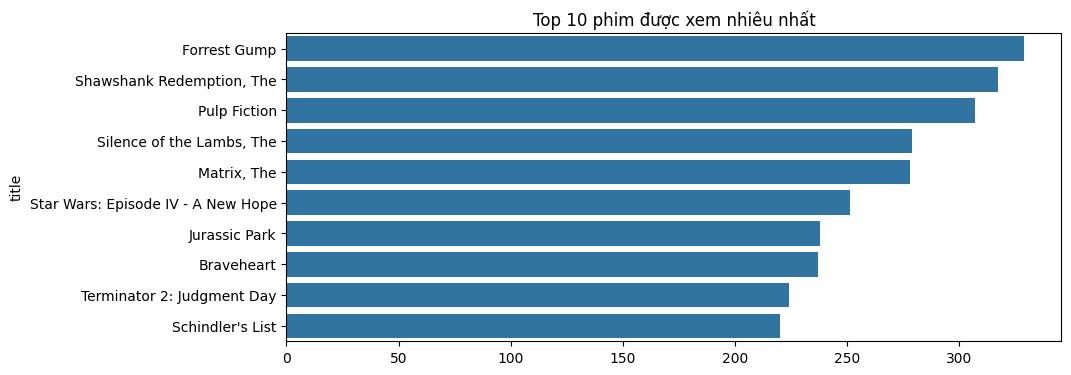

userId
1      4.366379
2      3.948276
3      2.435897
4      3.555556
5      3.636364
         ...   
606    3.657399
607    3.786096
608    3.134176
609    3.270270
610    3.688556
Name: rating, Length: 610, dtype: float64

In [50]:
rating_counts = df['title'].value_counts().head(10)

plt.figure(figsize=(10,4))
sns.barplot(x=rating_counts.values, y=rating_counts.index)
plt.title("Top 10 phim được xem nhiêu nhất")
plt.show()

avg_rating_per_user = df.groupby('userId')['rating'].mean()
avg_rating_per_user

[26818, 13211, 20047, 7551, 2811, 8551, 13136, 5550, 1370, 1791]

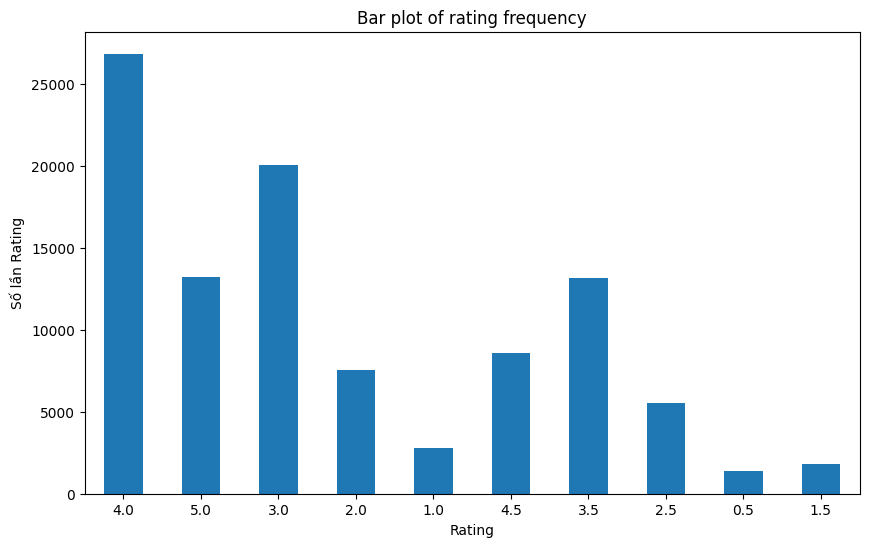

In [53]:
df['rating'].value_counts(sort=False).plot(kind='bar' ,figsize=(10,6), use_index = True, rot=0)
plt.title('Bar plot of rating frequency')
plt.xlabel('Rating')
plt.ylabel('Số lần Rating')
label = list(df['rating'].value_counts(sort=False))
label


# Vsual của em không pip install scikit-surprise được ạ 

In [ ]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse, mae

ModuleNotFoundError: No module named 'surprise'